### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
#Checking data for missing values
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

2. Investigate the dataset for missing or problematic data.

In [4]:
missing_vals = data.isnull().sum()
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#Bar option will be very heavily used in this research, removing not nulls, another option was change it to Never but the overall records are small so not necessary to create data
df = data[['destination', 'passanger','temperature','weather','age','time','coupon','expiration','gender','maritalStatus','has_children','education','Bar','occupation','income','Y']]
df = df[df['Bar'].notnull()]
df.head()

,destination,passanger,temperature,weather,age,time,coupon,expiration,gender,maritalStatus,has_children,education,Bar,occupation,income,Y
0,No Urgent Place,Alone,55,Sunny,21,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,Some college - no degree,never,Unemployed,$37500 - $49999,1
1,No Urgent Place,Friend(s),80,Sunny,21,10AM,Coffee House,2h,Female,Unmarried partner,1,Some college - no degree,never,Unemployed,$37500 - $49999,0
2,No Urgent Place,Friend(s),80,Sunny,21,10AM,Carry out & Take away,2h,Female,Unmarried partner,1,Some college - no degree,never,Unemployed,$37500 - $49999,1
3,No Urgent Place,Friend(s),80,Sunny,21,2PM,Coffee House,2h,Female,Unmarried partner,1,Some college - no degree,never,Unemployed,$37500 - $49999,0
4,No Urgent Place,Friend(s),80,Sunny,21,2PM,Coffee House,1d,Female,Unmarried partner,1,Some college - no degree,never,Unemployed,$37500 - $49999,0


4. What proportion of the total observations chose to accept the coupon?



In [6]:
#Using query
#(df.query('Y == 1')['Y'].count()  / df.query('Y')['Y'].count()) * 100
#Using DataFrame Filter
df['Y'].mean() * 100

56.88956030849964

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

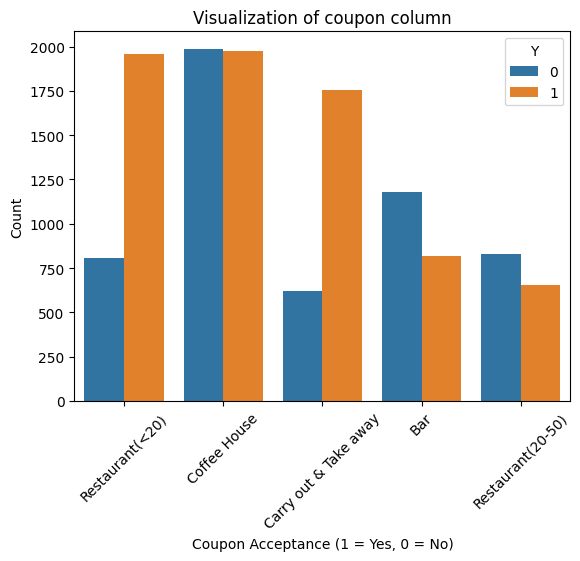

In [7]:
sns.countplot(x='coupon', hue='Y', data=df)
plt.title('Visualization of coupon column')
plt.xlabel('Coupon Acceptance (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count')

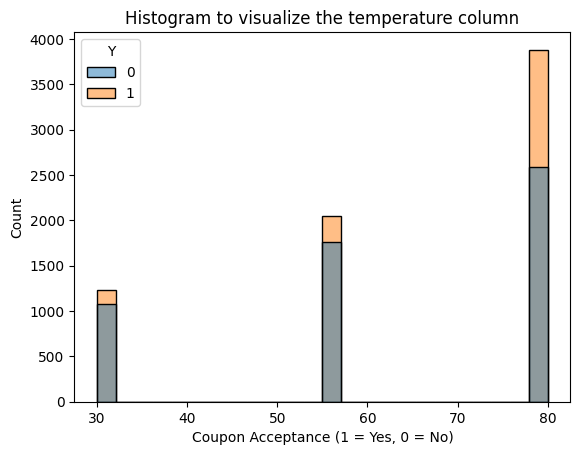

In [8]:
sns.histplot(x='temperature', hue='Y', data=df)
plt.title('Histogram to visualize the temperature column')
plt.xlabel('Coupon Acceptance (1 = Yes, 0 = No)')
plt.ylabel('Count')


In [9]:
# Understand the data of occupation column for further research, can be commneted 
df.groupby('occupation').size()

occupation
Architecture & Engineering                    175
Arts Design Entertainment Sports & Media      586
Building & Grounds Cleaning & Maintenance      44
Business & Financial                          538
Community & Social Services                   241
Computer & Mathematical                      1390
Construction & Extraction                     154
Education&Training&Library                    921
Farming Fishing & Forestry                     43
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Installation Maintenance & Repair             133
Legal                                         219
Life Physical Social Science                  170
Management                                    832
Office & Administrative Support               639
Personal Care & Service                       175
Production Occupations                        110
Protective Service                     

In [10]:
# Understand the data of passanger column for further research, can be commneted 
df.groupby('passanger').size()

passanger
Alone        7261
Friend(s)    3265
Kid(s)        988
Partner      1063
dtype: int64

In [11]:
# Understand the data of Bar column for further research, can be commneted 
df.groupby('Bar').size()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
dtype: int64

In [12]:
# Understand the data of age column for further research, can be commneted 
df.groupby('age').size()

age
21         2647
26         2547
31         2012
36         1297
41         1065
46          686
50plus     1776
below21     547
dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_df = df[df['coupon'] == 'Bar']


2. What proportion of bar coupons were accepted?


In [14]:
bar_df['Y'].mean() * 100

41.032064128256515

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [85]:
df_bar3orless = bar_df[bar_df['Bar'] <= '3']
df_bar3plus = bar_df[bar_df['Bar'] > '3']

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [86]:
ar_bar3orless = df_bar3orless['Y'].mean()
ar_bar3plus = df_bar3plus['Y'].mean()
print("Bar 3 or less (%) : ",ar_bar3orless.round(2)*100, "Bar 3Plus (%) : ", ar_bar3plus.round(2) *100)

Bar 3 or less (%) :  65.0 Bar 3Plus (%) :  35.0


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [17]:
#Filter Method
df_barmonthly = bar_df[bar_df['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['passanger'] != 'Alone') & (bar_df['occupation'] != 'Farming Fishing & Forestry')]
#Query Method
df_barmonthly = bar_df.query('Bar in ["1~3", "4~8", "gt8"] and passanger not in ["Alone", "Kid(s)"] and occupation != "Farming Fishing & Forestry"')
df_barmonthly = df_barmonthly['Y'].mean()
print(df_barmonthly)

0.717948717948718


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:
df1 = bar_df[bar_df['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed')]
print(bar_df['Y'].mean() * 100)

df2 = bar_df[bar_df['Bar'].isin(['1~3', '4~8', 'gt8']) & bar_df['age'].isin(['21', '26', 'below21']) ]
print(df2['Y'].mean() * 100)


df3 = data[data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']) & (data['coupon'] == 'Bar'))]
print(df3['Y'].mean() * 100)


41.032064128256515
72.17391304347827
45.348837209302324


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who accepted the coupons are younger, eat in cheaper restuarants more often and may have income less than 50k.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
coffee_df = df[df['coupon'] == 'Coffee House']

In [ ]:
In the morning time coffee house coupon acceptance is positive and that makes sense.

<Figure size 1200x600 with 0 Axes>

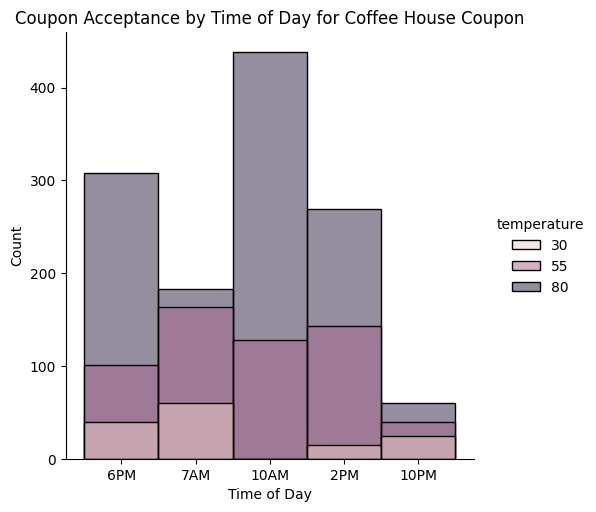

In [38]:
# Analyze the impact of time on coupon acceptance
plt.figure(figsize=(12, 6))
sns.displot(x='time', hue='temperature', data=coffee_df[coffee_df['Y'] == 1])
plt.title('Accepted Coupon by Time of Day and Temperature for Coffee House Coupon')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

In [ ]:
Most coupons for coffee are accepted around 10AM and when temperature is in 80s.

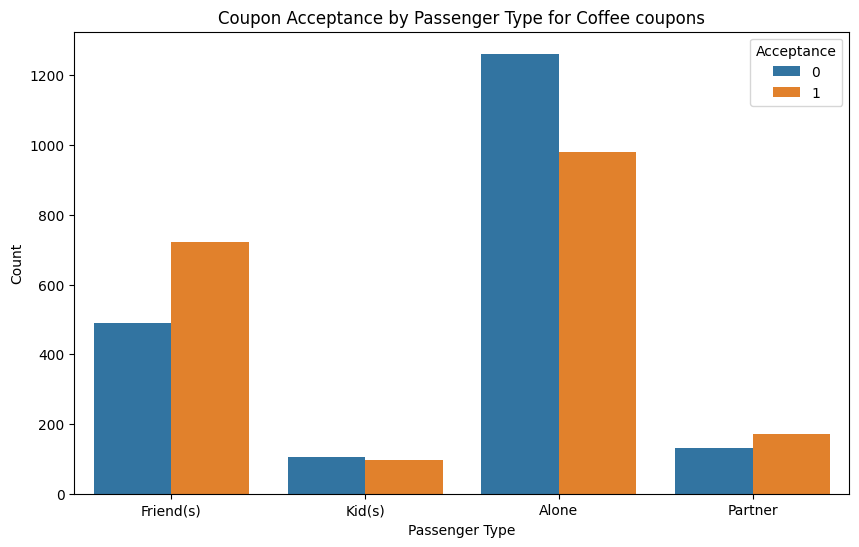

In [42]:
# Analyze the impact of passenger type on coupon acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='Y', data=coffee_df)
plt.title('Coupon Acceptance by Passenger Type for Coffee coupons')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Acceptance')
plt.show()

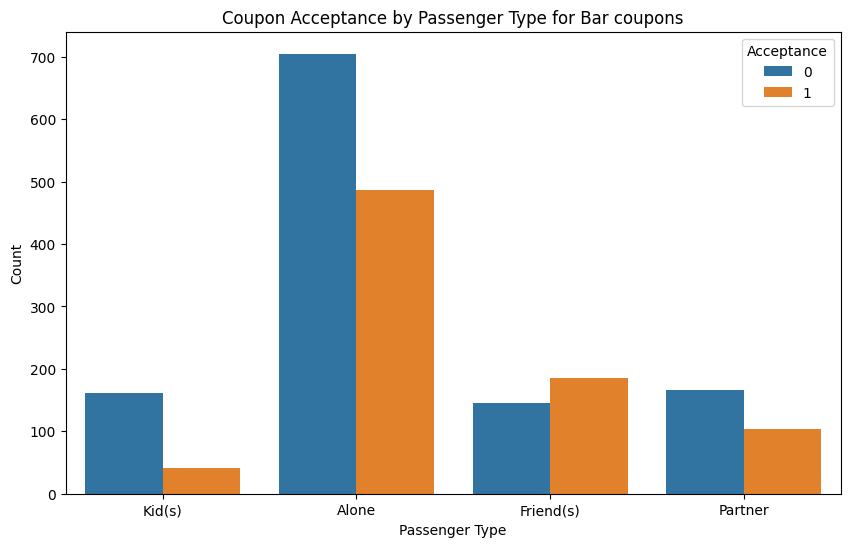

In [41]:
# Analyze the impact of passenger type on coupon acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='Y', data=bar_df)
plt.title('Coupon Acceptance by Passenger Type for Bar coupons')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Acceptance')
plt.show()

In [ ]:
For both Bar and Coffee house, people accept more coupons when they are alone.

In [ ]:
# Analyzing customers who didn't accept the coupon


In [48]:
no_df = df[df['Y'] == 0]

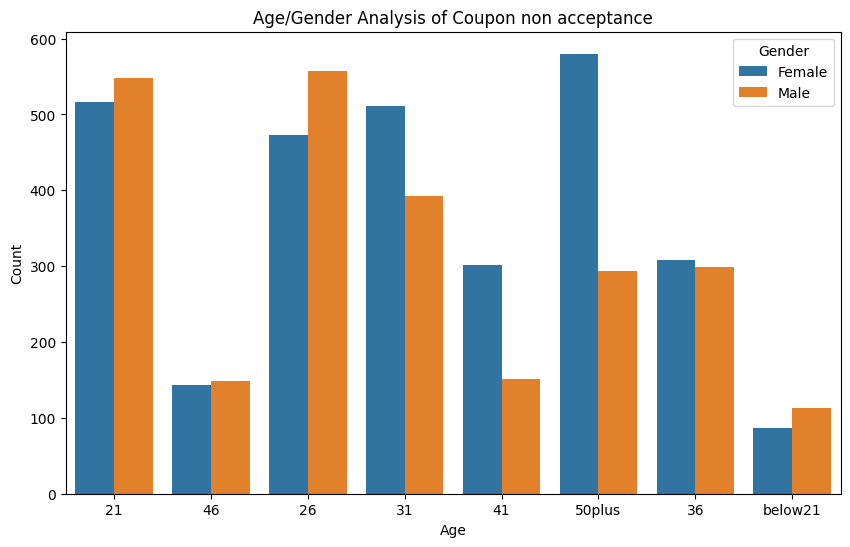

In [53]:
# Age Group and Gender Analysis of people not accepting coupons
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='gender', data=no_df)
plt.title('Age/Gender Analysis of Coupon non acceptance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()